In [0]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn import metrics
import seaborn as sns

In [0]:
wines = datasets.load_wine()

In [4]:
X_wines = wines.data
Y_wines = wines.target
xw = pd.DataFrame(X_wines, columns = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
                                      'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 
                                      'Colour Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
yw = pd.DataFrame(Y_wines, columns = ['Target'])
xw.head(5)

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i, max_iter=1000)
    gmm.fit(xw)
    yw_gmm = gmm.predict(xw)
    accuracy =  metrics.adjusted_rand_score(Y_wines, yw_gmm)
    print(f'numero de n_clusters: {i} accurracy {accuracy}')

numero de n_clusters: 1 accurracy 0.0
numero de n_clusters: 2 accurracy 0.5104256810035303
numero de n_clusters: 3 accurracy 0.6074836799117163
numero de n_clusters: 4 accurracy 0.3999981546681055
numero de n_clusters: 5 accurracy 0.26017828230560747
numero de n_clusters: 6 accurracy 0.3487554980800502
numero de n_clusters: 7 accurracy 0.23234381958034478
numero de n_clusters: 8 accurracy 0.2091873837003027
numero de n_clusters: 9 accurracy 0.1677233228910304
numero de n_clusters: 10 accurracy 0.19734104192102614


In [16]:
gmm = GaussianMixture(n_components=3, max_iter=1000)
gmm.fit(xw)
yw_gmm = gmm.predict(xw)
accuracy =  metrics.adjusted_rand_score(Y_wines, yw_gmm)
print(accuracy)

0.6074836799117163


In [17]:
yw_gmm_df = pd.DataFrame(yw_gmm, columns = ['Prediction'])
yw_gmm_df

,Prediction
0,1
1,1
2,1
3,1
4,1
...,...
173,0
174,0
175,0
176,0


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


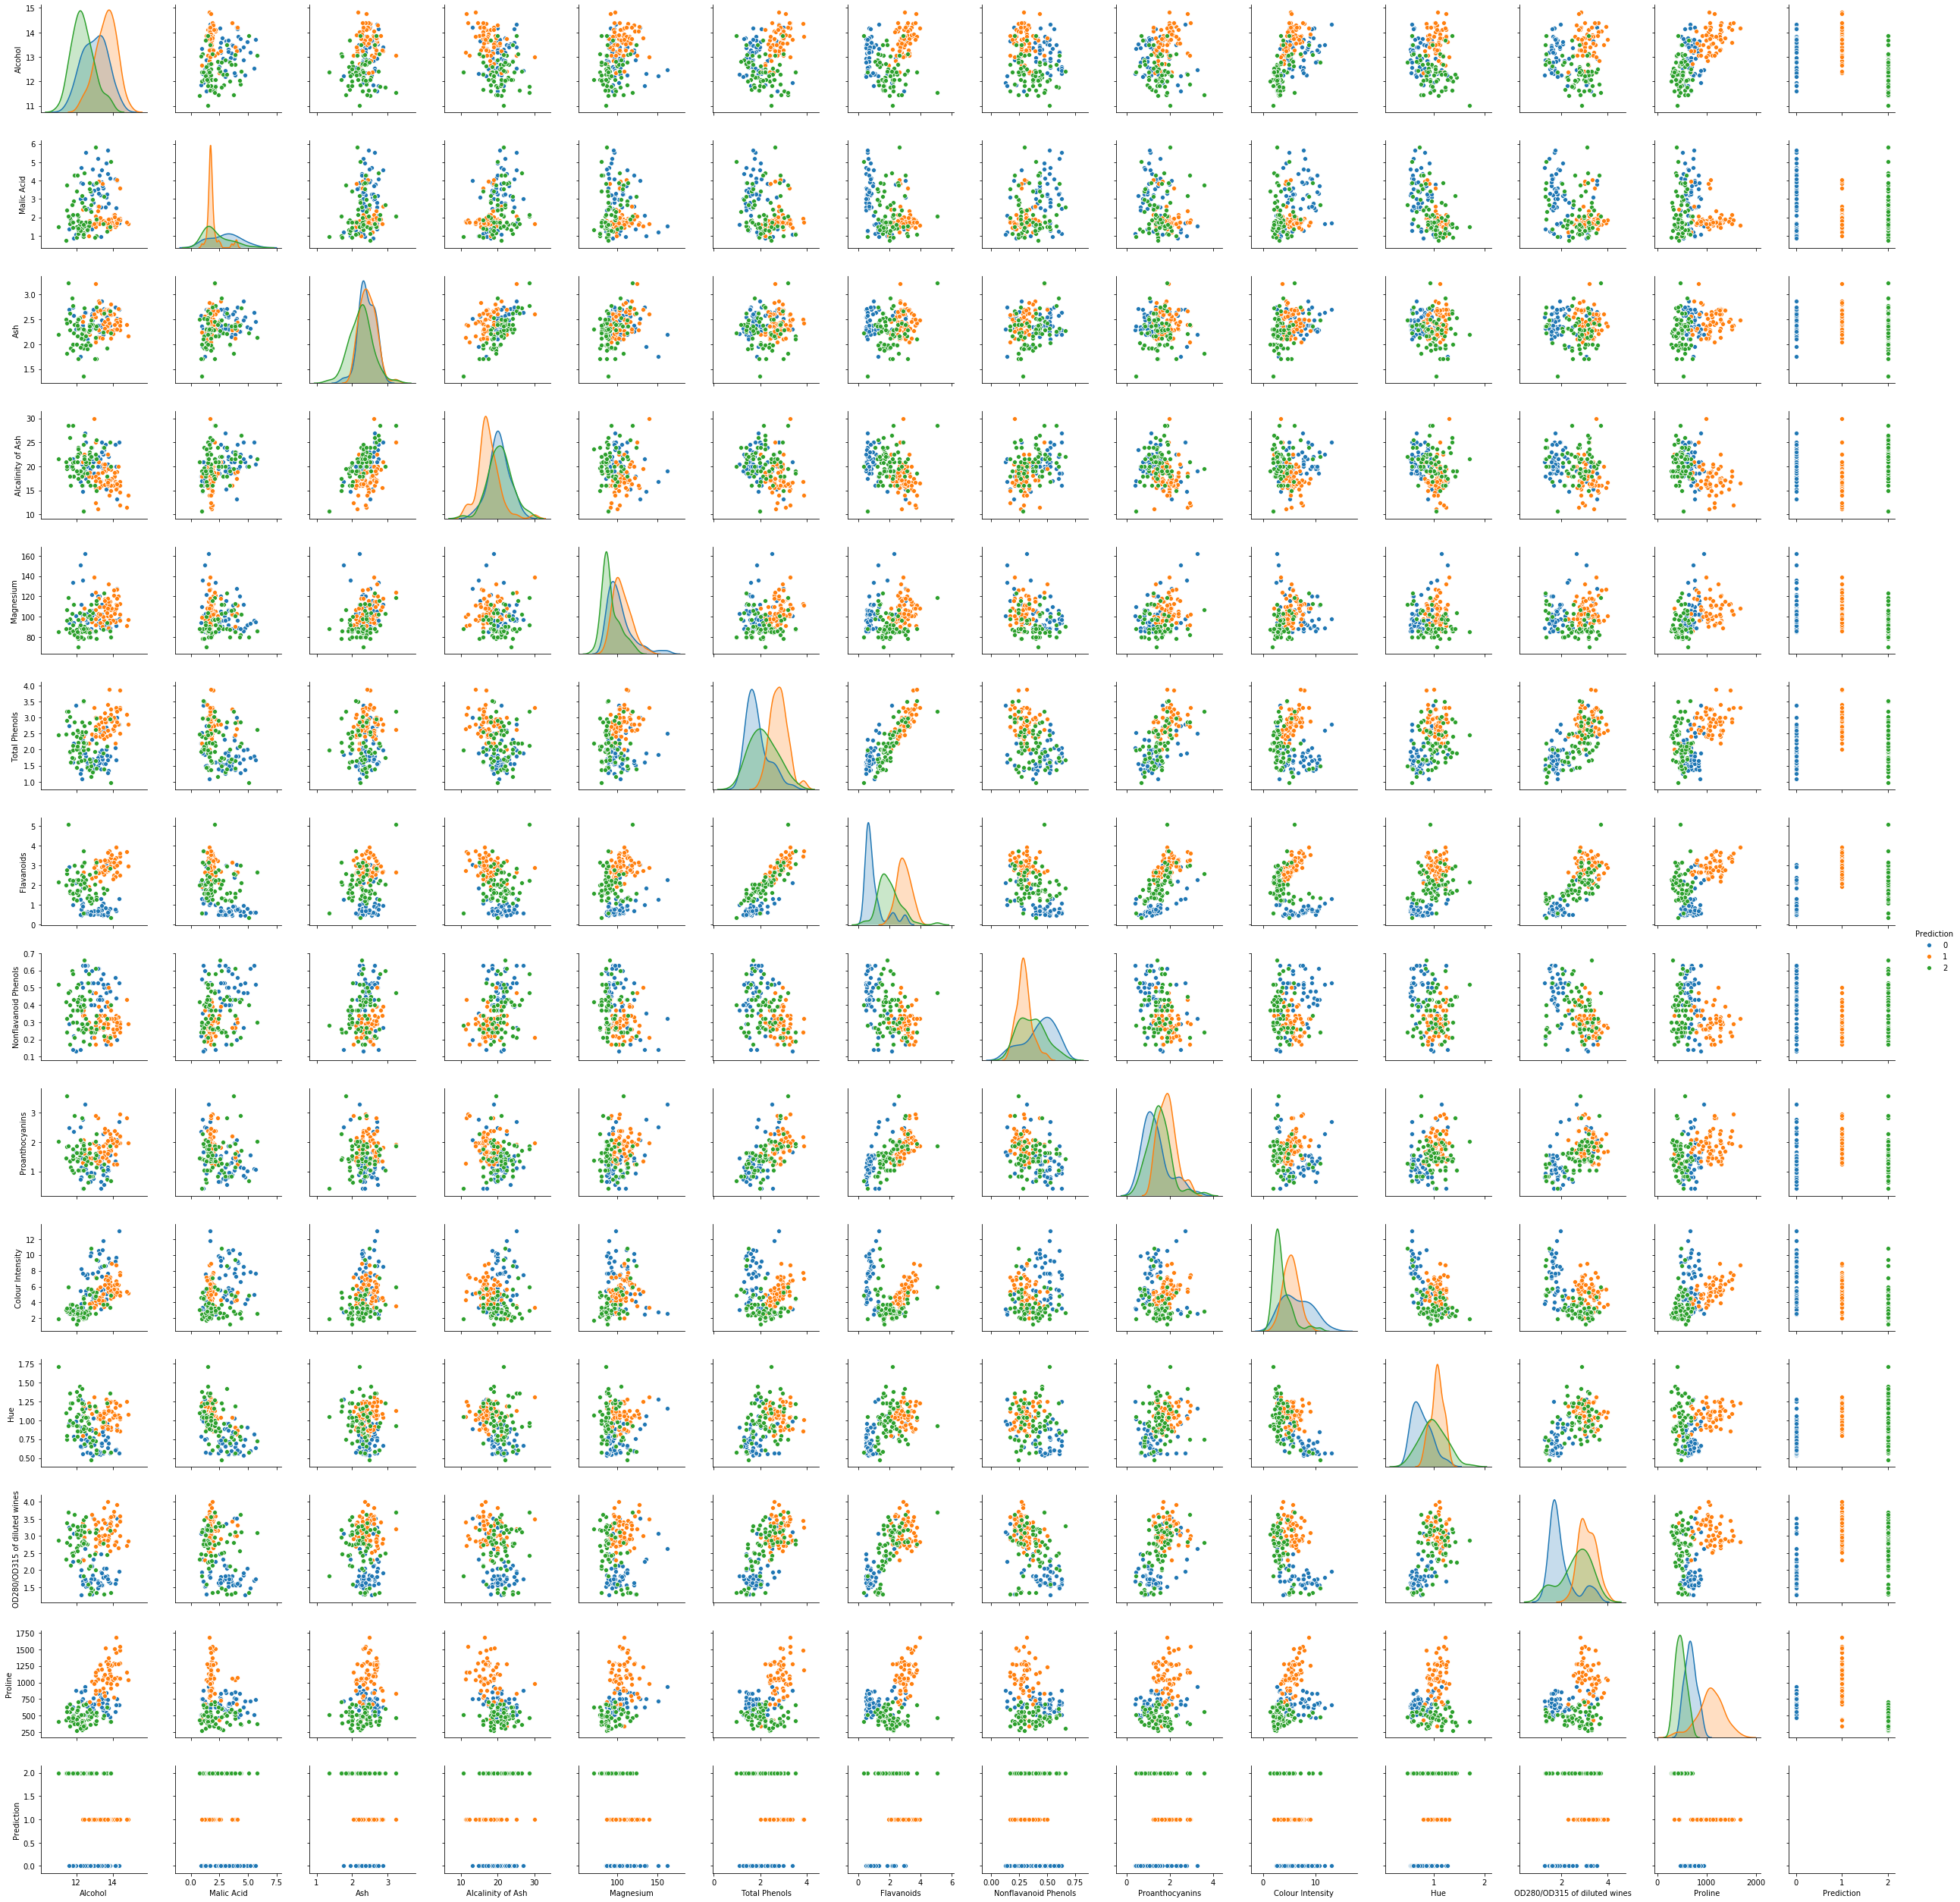

In [18]:
Z = pd.concat([xw,yw_gmm_df],axis=1)
sns.pairplot(Z, hue = 'Prediction')